<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab08_Derivadas_e_integrales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sc
import sympy as sp

## Parte 1

En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de L, la primera ley de kirshhoff nos da la siguiente relación

\begin{equation}
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
\end{equation}

donde $R$, es la resistencia del ciruito, $I$ es la corriente. Suponga que medimos la corriente con varios valores de $t$ y obtenemos:

``t = 1.00, 1.01, 1.02, 1.03, 1.04``

``i = 3.10, 3.12, 3.14, 3.18, 3.24``


donde $t$ se mide en segundos, $I$ se da en Amperios, la inductancia $L$ es una constante de 0.98 H, la resistencia es de 0.142 $\Omega$. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente
- Emplee un metodo calcular la derivada numérica.

In [2]:
# Definimos nuestros valores
L = 0.98
R = 0.142

t = np.array([1, 1.01, 1.02, 1.03, 1.04])
I = np.array([3.10, 3.12, 3.14, 3.18, 3.24])

# DataFrame
dicc = {'Tiempo (s)':t, 'Corriente (A)':I}
df = pd.DataFrame(dicc)
df

,Tiempo (s),Corriente (A)
0,1.00,3.10
1,1.01,3.12
2,1.02,3.14
3,1.03,3.18
4,1.04,3.24


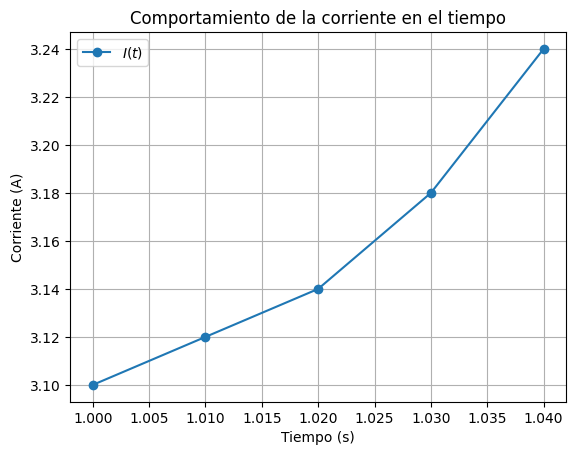

In [3]:
# Graficamos la corriente en el tiempo
plt.title('Comportamiento de la corriente en el tiempo')
plt.plot(df['Tiempo (s)'], df['Corriente (A)'], 'o-', label = '$I(t)$')
plt.xlabel('Tiempo (s)')
plt.ylabel('Corriente (A)')
plt.legend()
plt.grid()

In [4]:
# Calculemos la derivada de I

dI = np.gradient(I, t)
dI

array([2., 2., 3., 5., 6.])

In [5]:
# Otra forma
di = np.diff(I)
dt = np.diff(t)
d = di/dt
d

array([2., 2., 4., 6.])

In [6]:
# Calculamos el valor de la fem
e = L*dI + R*I
df['fem (V)'] = e
df

,Tiempo (s),Corriente (A),fem (V)
0,1.00,3.10,2.40020
1,1.01,3.12,2.40304
2,1.02,3.14,3.38588
3,1.03,3.18,5.35156
4,1.04,3.24,6.34008


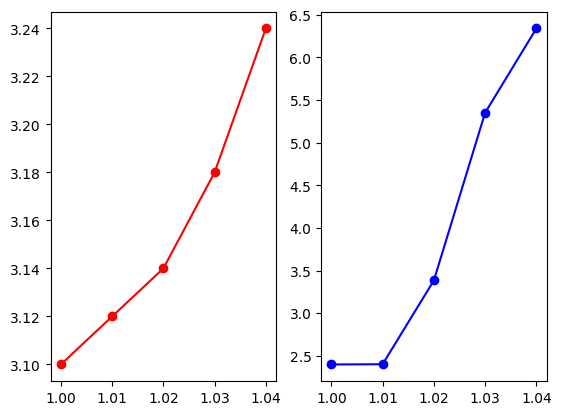

In [7]:
fig, axs = plt.subplots(1, 2)

axs[0].plot(df['Tiempo (s)'], df['Corriente (A)'], 'ro-', label = '$I(t)$')
axs[1].plot(df['Tiempo (s)'], df['fem (V)'], 'bo-', label = 'ε(t)')


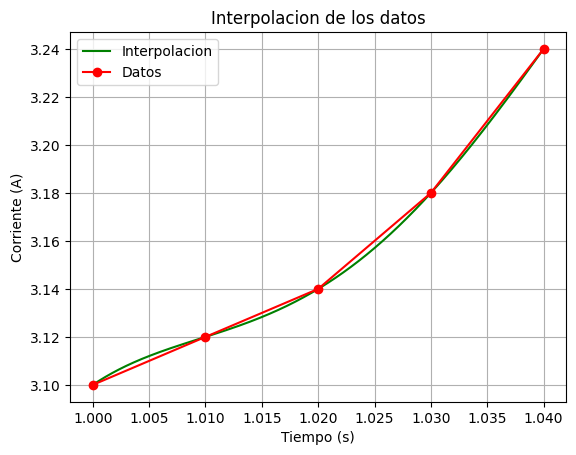

In [8]:
l = sc.interpolate.lagrange(t, I)

x = np.linspace(np.min(t), np.max(t), 1000)

plt.title('Interpolacion de los datos')
plt.plot(x, l(x), 'g', label = 'Interpolacion')
plt.plot(t,I, 'ro-', label = 'Datos')
plt.xlabel('Tiempo (s)')
plt.ylabel('Corriente (A)')
plt.legend()
plt.grid()

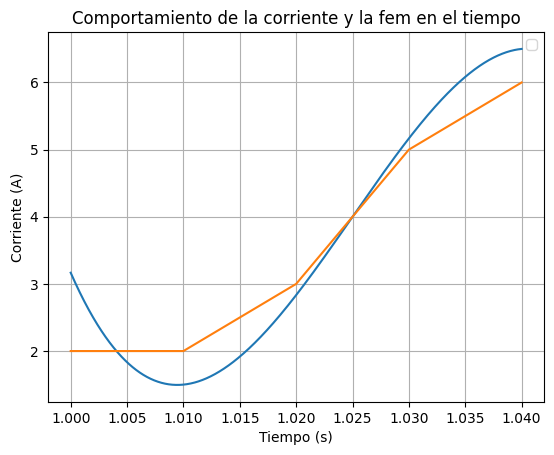

In [9]:
def diff_f(f, x, h):

  d = (-25*f(x) + 48*f(x+h)- 36*f(x+2*h) + 16*f(x+3*h) -3*f(x+4*h))/(12*h)

  return d

d = diff_f(l, x, x[1]-x[0])

plt.title('Comportamiento de la corriente y la fem en el tiempo')
plt.plot(x, d, label = '')
plt.plot(t, dI, label = '')
plt.xlabel('Tiempo (s)')
plt.ylabel('Corriente (A)')
plt.legend()
plt.grid()

## Parte 2
1. Escribir en código Markdown la expresión para calcular una integral con la regla del trapecio.

2. Escribir en código Markdown la expresión para calcular una integral con la regla del simpson.

3. Escribir en código Markdown la expresión para calcular una integral con el metodo de cuadratura.

4. Calcular una aproximación con el metodo 1,2,3 de las siguientes integrales

---
$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx}
 $$

----
$$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
 $$


----

$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dxdy}
 $$

---

Garantizando  que el error sea menor a $\varepsilon=1\times 10^{-5}$.

## 1. Regla del trapecio

La expresión para calcular una integral usando la regla del trapecio es:

\begin{equation}
  \int_{a}^{b} f(x) \, dx \approx \frac{b-a}{2n} \left[ f(a) + f(b) + 2 \sum_{i=1}^{n-1}f(x_{i})\right  ]
\end{equation}

Su error esta dado por:

\begin{equation}
-\frac{(b-a)^3}{12n^2}f''(ξ)
\end{equation}


## 2. Regla de simpson

La expresión para calcular una integral con la regla de SImpson es:

\begin{equation}
  \int_{a}^{b}f(x) dx\approx \frac{b-a}{3n} \left[ f(a) + f(b) + 2 \sum_{i=1}^{\frac{n}{2}-1}f(x_{2i}) + 4 \sum_{i=1}^{\frac{n}{2}} f(x_{2i-1})
\right  ]
\end{equation}

Su error esta dado por:

\begin{equation}
-\frac{(b-a)^5}{180n^4}f^{(4)}(ξ)
\end{equation}

## 3. Método de cuadratura

La forma e calcular una integral con el método de cuadratura es

\begin{equation}
  \int_{a}^{b}f(x) dx≈ \sum_{i=1}^{n}w_if(x_i)
\end{equation}

donde $w_i$ son los pesos asociados a los puntos de cuadratura $x_i$

In [10]:
# Definimos las funciones para el calculo de las integrales

# Trapecios
def trapecios(f, fs, a, b):
  n = int(1e7)
  xp = np.linspace(a, b, n)
  h = (b - a)/n

  # Definimos nuestra funcion simbolicamente
  y = sp.symbols('y')

  # Calculamos la segunda derivada de la funcion
  d2f = sp.diff(fs(y), y, 2)
  f2 = sp.lambdify(y, d2f, 'numpy') # Comvertimos la funcion simbolica en una funcion de numpy

  max = np.max(abs(f2(xp)))

  error = (-(b-a)**3)/(12*n**2)*max

  c = 0
  for i in range(1, n):
   c += f(a + i*h)

  I = h/2 * (f(a) + f(b) + 2*c)

  return I, abs(error)

# Simpson
def simpson(f, fs, a, b):
  n = int(1e7)
  xp = np.linspace(a, b, n)
  h = (b - a)/n

  # Definimos nuestra funcion simbolicamente
  y = sp.symbols('y')

  # Calculamos la segunda derivada de la funcion
  d4f = sp.diff(fs(y), y, 4)
  f4 = sp.lambdify(y, d4f, 'numpy') # Comvertimos la funcion simbolica en una funcion de numpy

  max = np.max(abs(f4(xp)))

  error = - (b-a)/180 * h**4 * max

  c = 0
  for i in range(1, int(n/2 - 1)):
   c += f(a + 2*i*h)

  d = 0
  for i in range(1, int(n/2)):
    d += f(a + (2*i-1)*h)

  I = h/3 * (f(a) + f(b) + 2*c + 4*d)

  return I, abs(error)

# La cuadratura la calculamos usando quad

In [11]:
# Definimos las funciones de las integrales a calcular
t = lambda x: 1/np.sqrt(np.tan(x))

f = lambda x: np.cos(x)/(x**3)

g = lambda x: 1/np.sqrt(1-x**2)

In [12]:
# Definimos las funciones con sympy para calcular los errores
ts = lambda x: 1/sp.sqrt(sp.tan(x))

fs = lambda x: sp.cos(x)/(x**3)

gs = lambda x: 1/sp.sqrt(1-x**2)

In [13]:
# Calculo de la primer integral
print(f'El valor de la integral y su error maximo con el metodo del trapecio son {trapecios(t, ts, 1e-11, np.pi/2)}')
print(f'El valor de la integral y su error maximo con el metodo de simpson son {simpson(t, ts, 1e-11, np.pi/2)}')
print(f'El valor de la integral y su error maximo con el metodo de cuadratura son {sc.integrate.quad(t, 1e-11, np.pi/2)}')

El valor de la integral y su error maximo con el metodo del trapecio son (2.2456991204851873, 7660191880409.317)
El valor de la integral y su error maximo con el metodo de simpson son (2.2375002072898798, 2.772459177772075e+27)
El valor de la integral y su error maximo con el metodo de cuadratura son (2.2214414696578597, 1.680438854734234e-08)


In [14]:
# Calculo de la segunda integral
print(f'El valor de la integral y su error maximo con el metodo del trapecio son {trapecios(f, fs, 1, 1e2)}')
print(f'El valor de la integral y su error maximo con el metodo de simpson son {simpson(f, fs, 1, 1e2)}')
print(f'El valor de la integral y su error maximo con el metodo de cuadratura son {sc.integrate.quad(f, 1, 1e2)}')

El valor de la integral y su error maximo con el metodo del trapecio son (0.018117090422865113, 8.888061157021462e-09)
El valor de la integral y su error maximo con el metodo de simpson son (0.018117090385673926, 1.8385952970791568e-18)
El valor de la integral y su error maximo con el metodo de cuadratura son (0.01811709040274776, 9.106342434136545e-13)


In [15]:
# Calculo de la tercer integral
# Definimos en intervalo de x
x = np.linspace(0, np.pi/4, 10000)
p = np.zeros_like(x)

# Haremos la primer integral de manera que tengamos un array de todos los valores de la primer integral en el intervalo de 0 a sin(x)
for i, j in enumerate(x):
  y = np.linspace(0, np.sin(j), 10000) # Intervalo de 0 a sin(x) para cada x
  p[i] = np.trapz(g(y), y) # Evaluamos la integral en cada intervalo para obtener el array

print(f'El valor de la integral doble es {np.trapz(p, x):.6}') # Calculamos la integral en dx

El valor de la integral doble es 0.308425


## Parte 3
Un péndulo físico en el regimen de pequeñas oscilaciones tiene un periodo de:

\begin{equation}
P_0=2\pi \sqrt{\frac{I_0}{mgb}}
\end{equation}

Cuando las oscilaciones no son pequeñas, podemos encontrar una expresión para el periodo como sigue:


La energia de un péndulo físico viene dada por:

\begin{equation}
E=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

En el punto más alejado de su posición de equilibrio, su energía es solo potencial y viene dada por:

\begin{equation}
Ep = mgb(1-\cos \theta),
\end{equation}

Igualando ambas expresiones tenemos que:

\begin{equation}
mgb(1-\cos \theta)=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

Integrando la ecuación respecto a $\theta$ y realizando la sustitución:

$\sin \phi = \frac{\sin \frac{\theta}{2}}{\sin \frac{\theta_0}{2}}$ y  $k = \sin \frac{\theta_0}{2}$, se puede encontrar  que el periodo de oscilación, viene dado en terminos de  la integral elíptica completa de primera especie:


\begin{equation}
P = \frac{2P_0}{\pi} \int _0^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

donde,  $P_0$ es el periodo de las oscilaciones pequeñas.

Determinar el periodo de oscilación de un péndulo. Para ello:

1. Suponga los párametros iniciales del pendulo.
2. Realice una buena planificación del código para calcular la integral.
3. Emplee un  método de integracion numérico que conozca.
4. Compruebe su solucion con el valor exacto de la integral mostrado en el punto

In [23]:
# Definimos los parametros iniciales del pendulo
g = 9.776
m = 0.5
b = 0.6
I0 = 0.2
theta0 = np.pi/3

# Definimos P0 y k
P0 = 2*np.pi*np.sqrt(I0/(m*g*b))
k = np.sin(theta0/2)

# Definimos la funcion para calcular la integral
P = lambda phi: 1 / np.sqrt(1 - k**2 * np.sin(phi)**2)
Ps = lambda phi: 1 / sp.sqrt(1 - k**2 * sp.sin(phi)**2) # Para calcular el error

I = simpson(P, Ps, 0, np.pi/2)[0]

# Integramos
print(f'El periodo de oscilacion del pendulo es de {2*P0 / (np.pi) * I:.3} s')

El periodo de oscilacion del pendulo es de 1.76 s


## Parte 4
The next  problems are examples of how elliptic integrals enter into realistic physics problems. It is straightforward to evaluate any integral numerically using the techniques of this chapter, but it may be difficult for you to  know if the answers you obtain are correct. One way to hone your integral evaluating skills is to compare your answers from quadrature to power series
expressions, or to a polynomial approximations of know precision. To help you in this regard, we present here a polynomial approximation for an elliptic integral (Abramowitz and Stegun, 1972):

\begin{equation}
K(m)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-m\sin^2\phi}}
\end{equation}

\begin{equation}
\approx a_0+a_1m_1+a_2m_1 - [ b_0+b_1m_1+b_2m_1^2]\ln m_1 + \epsilon(m)
\end{equation}


* $m_1 = 1-m$,

* $ 0 \le m \le1 $

* $\epsilon(m)\leq 3\times 10^{-5}$

* $a_0 = 1.3862944$

* $b_0 = 0.5$

* $a_1 = 0.1119723$

* $b_1 = 0.1213478$

* $a_2 = 0.00725296$

* $b_2 = 0.0288729$

In [17]:
# Definimos el valor de m como k^2 para verificar el resultado de la integral del punto anterior
m = k**2

# Definimos los valores del polinomio
m1 = 1 - m
0 < m < 1
ϵ = 3*1e-4
a0 = 1.3862944
b0 = 0.5
a1 = 0.1119723
b1 = 0.1213478
a2 = 0.00725296
b2 = 0.0288729

# Calculamos el valor del polinomio
P = a0 + a1*m1 + a2*m1 - (b0 + b1*m1 + b2*m1**2)*np.log(m1) + ϵ

# Comparamos el resultado de la integral con el polinomio
print(f'El valor de la integral es de {I:.3} mientras que el del polinomio es {P:.3}')

El valor de la integral es de 1.69 mientras que el del polinomio es 1.65


Vemos que el valor del polinomio se aproxima mucho al valor obtenido en la integral, por lo que podemos concluir que la integral ha dado un resultado correcto.

## Parte 5 (Opcional)

Figure 5.7 shows a current loop of radius a carrying a current I. The point P
is a distance r from the center of the loop with spherical coordinates (r, θ, φ).
Jackson (1988) solves for the φ component of the vector potential at point P
in terms of elliptic integrals:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}


where

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}


\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}


\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}



Here K(k) is a complete elliptic integral of the first kind and E(k) is a complete
elliptic integral of the second kind. For a = 1, I = 3, and μ0∕4π = 1, compute
and plot

a) Aφ(r = 1.1, θ) vs. θ

b) Aφ(r, θ = π∕3) vs. r


In [18]:
# Definamos todas las funciones necesarias

# Definimos k
def k(r, theta, a):
  k = np.sqrt( (4*a*r*np.sin(theta)) / (a**2 + r**2 + 2*a*r*np.sin(theta)) )

  return k

# Definimos la funcion a integral dentro de E
fe = lambda phi, r, theta, a: np.sqrt(1 - (k(r, theta, a))**2*(np.sin(phi))**2)

# Definimos E
def E(fe, r, theta, a):
  I = sc.integrate.quad(fe, 0, np.pi/2, args = (r, theta, a))

  return I[0]

# Definimos la funcion a integral dentro de K
fk = lambda phi, r, theta, a: 1/np.sqrt(1 - (k(r, theta, a))**2*(np.sin(phi))**2)

# Definimos K
def K(fk, r, theta, a):
  I = sc.integrate.quad(fk, 0, np.pi/2, args = (r, theta, a))

  return I[0]

# Definimos el potencial A
def A(r, theta, a, I, mu, fe, fk):
  k1 = k(r, theta, a)
  K1 = K(fk, r, theta, a)
  E1 = E(fe, r, theta, a)

  A = mu/(4*np.pi) * ( 4*I*a / (np.sqrt(a**2 + r**2 + 2*a*r*np.sin(theta))) ) * ( ((2 - k1**2)*K1 - 2*E1) / (k1**2) )

  return A

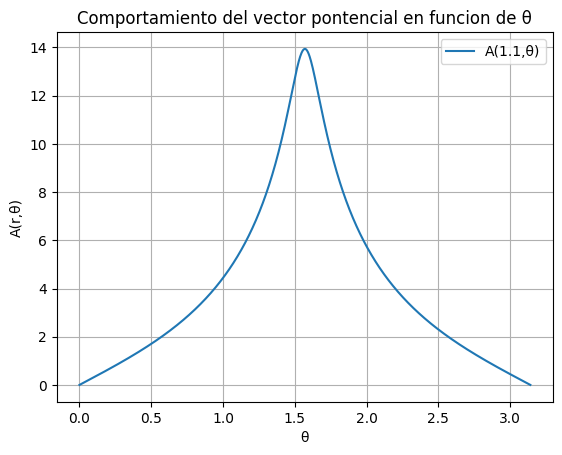

In [19]:
# Variables definidas
a = 1
I = 3
mu = 4*np.pi
r = 1.1

theta = np.linspace(1e-11, np.pi, 1000) # Variamos theta
b = np.zeros(1000) # Arreglo para calcular A al variar theta

# Calculamos A para todos los theta
for i,j  in enumerate(theta):
  b[i] = A(r, j, a, I, mu, fe, fk)

# Graficamos el comportamiento de A
plt.title('Comportamiento del vector pontencial en funcion de θ')
plt.plot(theta, b, label = 'A(1.1,θ)')
plt.xlabel('θ')
plt.ylabel('A(r,θ)')
plt.legend()
plt.grid()

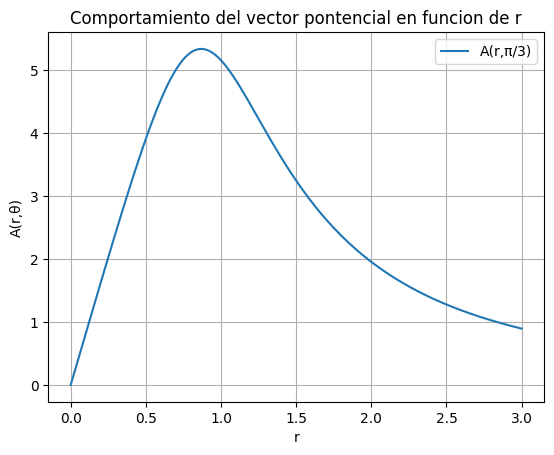

In [20]:
# Variables definidas
a = 1
I = 3
mu = 4*np.pi
theta = np.pi/3

r = np.linspace(1e-11, 3, 1000) # Variamos r
b = np.zeros(1000) # Arreglo para calcular A al variar r

# Calculamos A para todos los valores de r
for i,j  in enumerate(r):
  b[i] = A(j, theta, a, I, mu, fe, fk)

# Graficamos el comportamiento de A
plt.title('Comportamiento del vector pontencial en funcion de r')
plt.plot(r, b, label = 'A(r,π/3)')
plt.xlabel('r')
plt.ylabel('A(r,θ)')
plt.legend()
plt.grid()